## Mnist dataset

Let's play with fashion _mnist dataset

In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_label), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


##Exploring the data set and Preprocessing the dataset

In [3]:
train_label[0]

9

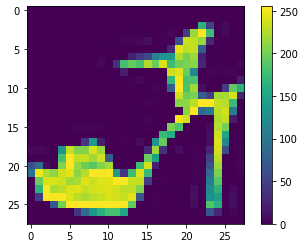

In [4]:
# Let looks into what is the image in label with an index 5
import matplotlib.pyplot as plt
plt.imshow(train_images[9])
plt.colorbar();

In [5]:
#We are giving the name to label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
class_names[9]

'Ankle boot'

In [7]:
train_images.shape, train_label.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

*Note* 28 is the size of the pixel

In [8]:
train_images.min(),train_images.max()

(0, 255)

We are going the scale the train and test data between 0 and 1 by diving max value 225

In [9]:
train_images = train_images/255
test_images = test_images/255

In [10]:
train_images.max(), test_images.max()

(1.0, 1.0)

We are going dispaly the images with title to check

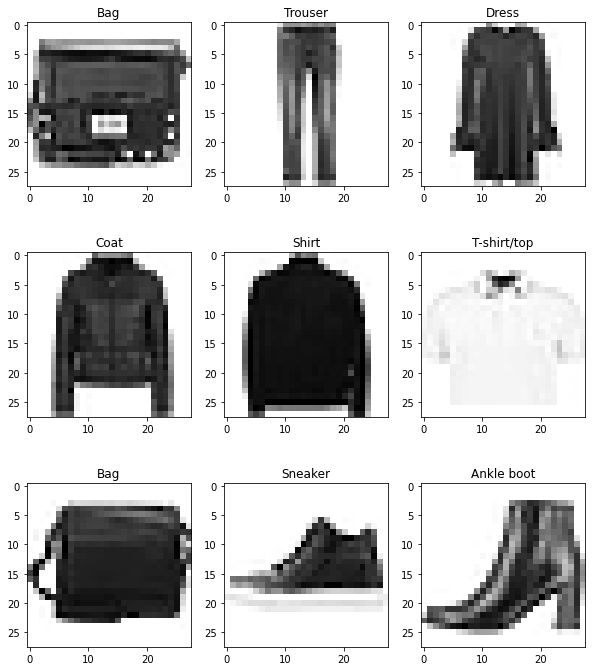

In [11]:
import random 
plt.figure(figsize=(10,12))
for i in range(9):
  plt.subplot(3,3,i+1)
  rand_index = random.choice(range(len(train_images)))
  plt.imshow(train_images[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_label[rand_index]])

##Model Building

In [12]:
# Setting Random seed
tf.random.set_seed(42)

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#Compile a model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

#Learning rate schedular
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model.fit(train_images, 
                            train_label,
                            epochs = 50,
                            validation_data = (test_images,test_labels),
                            callbacks = [lr_schedular])

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/50
1875/1875 [==============================] - 4s

In [15]:
model.evaluate(test_images, test_labels, verbose=0)

[2.3263204097747803, 0.10000000149011612]

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.predict(test_images)

array([[0.06219129, 0.12208828, 0.09808467, ..., 0.12663454, 0.10507569,
        0.08082296],
       [0.06219129, 0.12208828, 0.09808467, ..., 0.12663454, 0.10507569,
        0.08082296],
       [0.06219129, 0.12208828, 0.09808467, ..., 0.12663454, 0.10507569,
        0.08082296],
       ...,
       [0.06219129, 0.12208828, 0.09808467, ..., 0.12663454, 0.10507569,
        0.08082296],
       [0.06219129, 0.12208828, 0.09808467, ..., 0.12663454, 0.10507569,
        0.08082296],
       [0.06219129, 0.12208828, 0.09808467, ..., 0.12663454, 0.10507569,
        0.08082296]], dtype=float32)